<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>LangChain for Generative AI</h1>
<h1>Generative Models</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter
from pprint import pprint
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from IPython.display import Image

import requests
import shutil

import openai
from openai import OpenAI

import transformers
from transformers import pipeline
from transformers import set_seed

# Set the seed to get reproducible results
set_seed(42) 

from tqdm.notebook import tqdm

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.13.3
IPython version      : 9.2.0

Compiler    : Clang 17.0.0 (clang-1700.0.13.3)
OS          : Darwin
Release     : 25.0.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

Git hash: 24f5062fbf46a87bfe9be08eb40e50ecbf9f4e00

transformers: 4.52.3
requests    : 2.32.3
pandas      : 2.2.3
openai      : 1.78.1
numpy       : 2.2.5
matplotlib  : 3.10.3
tqdm        : 4.67.1
IPython     : 9.2.0
watermark   : 2.5.0



Load default figure style

In [3]:
plt.style.use('d4sci.mplstyle')

## OpenAI

In [4]:
client = OpenAI()

The recommended model for exploration is `gpt-3.5-turbo`, so we'll stick with it for now. The basic setup is relatively straightforward:

### Simple interaction

In [5]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
        {
            "role": "user", 
            "content": "What was Superman's weakness?"
        },
    ]
)

In [6]:
response

ChatCompletion(id='chatcmpl-CQyURVuLybQoWK3T3q9WuL2sOZjA4', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Superman's weakness is kryptonite, a radioactive mineral from his home planet Krypton. Exposure to kryptonite weakens Superman and can eventually lead to his death.", refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1760545087, model='gpt-3.5-turbo-0125', object='chat.completion', service_tier='default', system_fingerprint=None, usage=CompletionUsage(completion_tokens=35, prompt_tokens=13, total_tokens=48, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

Which produces the expected response

In [7]:
response.choices[0].message

ChatCompletionMessage(content="Superman's weakness is kryptonite, a radioactive mineral from his home planet Krypton. Exposure to kryptonite weakens Superman and can eventually lead to his death.", refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None)

In [8]:
response.choices[0].message.content

"Superman's weakness is kryptonite, a radioactive mineral from his home planet Krypton. Exposure to kryptonite weakens Superman and can eventually lead to his death."

### Multiple alternatives

To request multiple answers, we must include the `n` parameter with the number of answers we want

In [9]:
%%time
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {
            "role": "user", 
            "content": "What are the different kinds of Kryptonite?"
        },
    ],
    n=3
)

CPU times: user 3.12 ms, sys: 2.09 ms, total: 5.21 ms
Wall time: 3.83 s


And we can access each of the answers individually int he choices list

In [10]:
for output in response.choices:
    print("==========")
    print(output.message.role.title()) 
    print("==========")
    print(output.message.content)
    print("==========\n")

Assistant
There are several different kinds of Kryptonite in the DC Comics universe, each with its own unique properties and effects on the character Superman. Some of the most well-known types of Kryptonite include:

1. Green Kryptonite: The most common form of Kryptonite, green Kryptonite is deadly to Superman and weakens him, making him vulnerable to its effects. It is radioactive and can cause weakness, sickness, and potentially death in Kryptonians.

2. Red Kryptonite: Red Kryptonite has unpredictable and temporary effects on Superman, such as changing his personality or altering his powers. The effects of red Kryptonite are temporary and wear off after a certain amount of time.

3. Blue Kryptonite: Blue Kryptonite primarily affects Bizarro, a twisted version of Superman, instead of the real Superman. It has similar effects to green Kryptonite, weakening Bizarro and making him vulnerable.

4. Gold Kryptonite: Gold Kryptonite permanently removes a Kryptonian's powers, essentially m

### Language Translation

In [11]:
response = client.chat.completions.create(
    model='gpt-3.5-turbo',
    messages=[
        {
            "role": "system", 
            "content": "You're a professional English-Italian translator."
        }, 
        {
            "role": "user", 
             "content": "Translate 'Be the change that you wish to see in the world.' into Italian"
        }
    ],
    temperature=0,
)

In [12]:
response.choices[0].message.content

'"Sii il cambiamento che desideri vedere nel mondo."'

### Image generation

In [13]:
prompt = "A wimsical image of a toy duck with an eye patch and hat floating in the clouds"

In [14]:
%%time
response = client.images.generate(
    model="dall-e-3",
    prompt=prompt,
    size="1024x1024",
    response_format="url",
)

CPU times: user 3.36 ms, sys: 1.25 ms, total: 4.61 ms
Wall time: 12.1 s


In [15]:
response

ImagesResponse(created=1760545105, data=[Image(b64_json=None, revised_prompt="Create an endearing, whimsical image featuring a toy duck. The duck should be characterized by its unique accessories: a playful eye patch and a quirky hat. It's not just any ordinary scene though, this duck is floating freely amidst an enchanting dreamscape of fluffy white clouds. Although this duck might seem out of place, the contrast contributes to an overall sense of charm and whimsy.", url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-cEu7KbLexcTF7u2YnTgg3tFV/user-OYeHJ0J19d8sU7MeuMaFfyf7/img-GVGm1XGUZzKYjDeTd20vUyV5.png?st=2025-10-15T15%3A18%3A25Z&se=2025-10-15T17%3A18%3A25Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=b1a0ae1f-618f-4548-84fd-8b16cacd5485&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-10-15T05%3A31%3A41Z&ske=2025-10-16T05%3A31%3A41Z&sks=b&skv=2024-08-04&sig=ul5vs1SiXG58Ai6dL/72i1au86sN98w9BtkD/qwNg4s%3D')], usage=None)

Utility function to download the image

In [16]:
def download_file(url, filename):
    with requests.get(url, stream=True) as r:
        total_length = int(r.headers.get("Content-Length"))
        with tqdm.wrapattr(r.raw, "read", total=total_length, desc=filename) as raw:
            with open(filename, 'wb')as output:
                shutil.copyfileobj(raw, output)

In [17]:
image_dir = 'images/'

In [18]:
image_url = response.data[0].url

In [19]:
print(image_url)

https://oaidalleapiprodscus.blob.core.windows.net/private/org-cEu7KbLexcTF7u2YnTgg3tFV/user-OYeHJ0J19d8sU7MeuMaFfyf7/img-GVGm1XGUZzKYjDeTd20vUyV5.png?st=2025-10-15T15%3A18%3A25Z&se=2025-10-15T17%3A18%3A25Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=b1a0ae1f-618f-4548-84fd-8b16cacd5485&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-10-15T05%3A31%3A41Z&ske=2025-10-16T05%3A31%3A41Z&sks=b&skv=2024-08-04&sig=ul5vs1SiXG58Ai6dL/72i1au86sN98w9BtkD/qwNg4s%3D


In [20]:
image_filename = os.path.join(image_dir, 'ducky.png')
download_file(image_url, image_filename)

images/ducky.png:   0%|          | 0/1336653 [00:00<?, ?it/s]

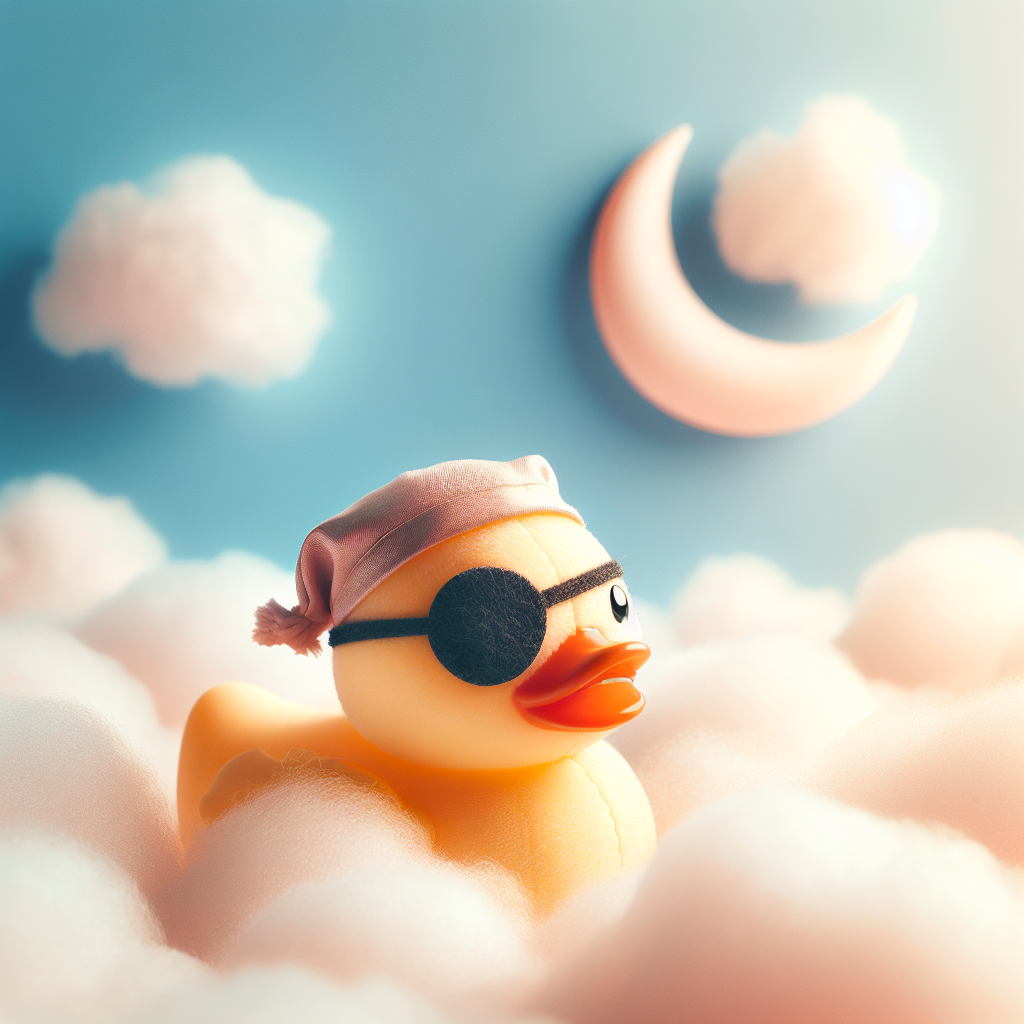

In [21]:
Image(filename=image_filename)

# HuggingFace

In [22]:
unmasker = pipeline('fill-mask', model='bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


In [23]:
unmasker("Artificial Intelligence [MASK] take over the world.")

[{'score': 0.31824207305908203,
  'token': 2064,
  'token_str': 'can',
  'sequence': 'artificial intelligence can take over the world.'},
 {'score': 0.18299764394760132,
  'token': 2097,
  'token_str': 'will',
  'sequence': 'artificial intelligence will take over the world.'},
 {'score': 0.05600173771381378,
  'token': 2000,
  'token_str': 'to',
  'sequence': 'artificial intelligence to take over the world.'},
 {'score': 0.04519490525126457,
  'token': 2015,
  'token_str': '##s',
  'sequence': 'artificial intelligences take over the world.'},
 {'score': 0.04515354335308075,
  'token': 2052,
  'token_str': 'would',
  'sequence': 'artificial intelligence would take over the world.'}]

### Question answering

In [24]:
text = """Dear Amazon, 

last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. 

Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. 

Sincerely, 

Bumblebee.
"""

In [25]:
reader = pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [26]:
question = "What does the customer want?"

In [27]:
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])    

,score,start,end,answer
0,0.631292,337,360,an exchange of Megatron


### Named Entity Recognition

In [28]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)    

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


,entity_group,score,word,start,end
0,ORG,0.879009,Amazon,5,11
1,MISC,0.990859,Optimus Prime,38,51
2,LOC,0.999755,Germany,92,99
3,MISC,0.556569,Mega,210,214
4,PER,0.590256,##tron,214,218
5,ORG,0.669693,Decept,255,261
6,MISC,0.498349,##icons,261,266
7,MISC,0.775361,Megatron,352,360
8,MISC,0.987854,Optimus Prime,369,382
9,PER,0.812096,Bumblebee,510,519


<center>
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</center>